In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Leitura de dados

O arquivo contendo todas as negociações do dia podem ser exportadas a partir das plataformas operacionais. Neste exemplo estou utilizando dos das negociações de mini-contratos de dólar futuro do dia 03/03/21. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dfTT = pd.read_csv('/content/drive/MyDrive/TradeControl/DSwithTrading/tt0303wdoj21.csv',encoding='unicode_escape')
dfTT

,Data,Compradora,Valor,Quantidade,Vendedora,Agressor
0,02/03/2021 09:00:53,Orama,5650,5,Tullett,Leilao
1,02/03/2021 09:00:53,Terra,5650,5,Tullett,Leilao
2,02/03/2021 09:00:53,Santander,5650,50,Tullett,Leilao
3,02/03/2021 09:00:53,Mirae,5650,5,Tullett,Leilao
4,02/03/2021 09:00:53,BTG,5650,5,Terra,Leilao
...,...,...,...,...,...,...
116443,03/03/2021 18:29:57,Ideal,"5623,5",5,Genial,Vendedor
116444,03/03/2021 18:29:58,Nova Futura,5627,5,Orama,Vendedor
116445,03/03/2021 18:29:59,Nova Futura,5627,10,Renascenca,Vendedor
116446,03/03/2021 18:29:59,Nova Futura,5627,5,Renascenca,Vendedor


In [5]:
dfTT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116448 entries, 0 to 116447
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Data        116448 non-null  object
 1   Compradora  116448 non-null  object
 2   Valor       116448 non-null  object
 3   Quantidade  116448 non-null  int64 
 4   Vendedora   116448 non-null  object
 5   Agressor    116448 non-null  object
dtypes: int64(1), object(5)
memory usage: 5.3+ MB


Apesar de o DataFrame dfTT não apresenta nenhum 
dado faltante ou linhas com valores NaN. A coluna Data não está organizada de uma maneira prática. Precisamos separar horário de dia. 

# Análise exploratória de dados

## Ajustando o DataFrame

### Separando a coluna 'Data' em Dia e hora da negociação

In [10]:
time = pd.DataFrame()
time[['Data','Hora']] = dfTT['Data'].str.split(' ',expand=True)

dfH = pd.DataFrame()
dfH[['Hora','Minuto','Segundo']] = time['Hora'].str.split(':',expand=True)
result = pd.concat([time['Data'],dfH],axis=1)
result

,Data,Hora,Minuto,Segundo
0,02/03/2021,09,00,53
1,02/03/2021,09,00,53
2,02/03/2021,09,00,53
3,02/03/2021,09,00,53
4,02/03/2021,09,00,53
...,...,...,...,...
116443,03/03/2021,18,29,57
116444,03/03/2021,18,29,58
116445,03/03/2021,18,29,59
116446,03/03/2021,18,29,59


In [11]:
dfTT = dfTT.drop('Data',axis=1)

In [14]:
dfTT = pd.concat([result,dfTT],axis=1)
dfTT

,Data,Hora,Minuto,Segundo,Data,Hora,Minuto,Segundo,Compradora,Valor,Quantidade,Vendedora,Agressor
0,02/03/2021,09,00,53,02/03/2021,09,00,53,Orama,5650,5,Tullett,Leilao
1,02/03/2021,09,00,53,02/03/2021,09,00,53,Terra,5650,5,Tullett,Leilao
2,02/03/2021,09,00,53,02/03/2021,09,00,53,Santander,5650,50,Tullett,Leilao
3,02/03/2021,09,00,53,02/03/2021,09,00,53,Mirae,5650,5,Tullett,Leilao
4,02/03/2021,09,00,53,02/03/2021,09,00,53,BTG,5650,5,Terra,Leilao
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116443,03/03/2021,18,29,57,03/03/2021,18,29,57,Ideal,"5623,5",5,Genial,Vendedor
116444,03/03/2021,18,29,58,03/03/2021,18,29,58,Nova Futura,5627,5,Orama,Vendedor
116445,03/03/2021,18,29,59,03/03/2021,18,29,59,Nova Futura,5627,10,Renascenca,Vendedor
116446,03/03/2021,18,29,59,03/03/2021,18,29,59,Nova Futura,5627,5,Renascenca,Vendedor


### Trocando ',' para  '.' em valores financeiros

In [13]:
newDf = dfTT  
newDf

,Data,Hora,Minuto,Segundo,Compradora,Valor,Quantidade,Vendedora,Agressor
0,02/03/2021,09,00,53,Orama,5650,5,Tullett,Leilao
1,02/03/2021,09,00,53,Terra,5650,5,Tullett,Leilao
2,02/03/2021,09,00,53,Santander,5650,50,Tullett,Leilao
3,02/03/2021,09,00,53,Mirae,5650,5,Tullett,Leilao
4,02/03/2021,09,00,53,BTG,5650,5,Terra,Leilao
...,...,...,...,...,...,...,...,...,...
116443,03/03/2021,18,29,57,Ideal,"5623,5",5,Genial,Vendedor
116444,03/03/2021,18,29,58,Nova Futura,5627,5,Orama,Vendedor
116445,03/03/2021,18,29,59,Nova Futura,5627,10,Renascenca,Vendedor
116446,03/03/2021,18,29,59,Nova Futura,5627,5,Renascenca,Vendedor


In [15]:
newDf['Quantidade'] = newDf['Quantidade'].astype(int)
newDf['Valor'] = newDf['Valor'].str.replace(',', '.').astype(float)

newDf

,Data,Hora,Minuto,Segundo,Compradora,Valor,Quantidade,Vendedora,Agressor
0,02/03/2021,09,00,53,Orama,5650.0,5,Tullett,Leilao
1,02/03/2021,09,00,53,Terra,5650.0,5,Tullett,Leilao
2,02/03/2021,09,00,53,Santander,5650.0,50,Tullett,Leilao
3,02/03/2021,09,00,53,Mirae,5650.0,5,Tullett,Leilao
4,02/03/2021,09,00,53,BTG,5650.0,5,Terra,Leilao
...,...,...,...,...,...,...,...,...,...
116443,03/03/2021,18,29,57,Ideal,5623.5,5,Genial,Vendedor
116444,03/03/2021,18,29,58,Nova Futura,5627.0,5,Orama,Vendedor
116445,03/03/2021,18,29,59,Nova Futura,5627.0,10,Renascenca,Vendedor
116446,03/03/2021,18,29,59,Nova Futura,5627.0,5,Renascenca,Vendedor


In [16]:
print(type(newDf['Valor'][0]),type(newDf['Quantidade'][0]))

<class 'numpy.float64'> <class 'numpy.int64'>


Perfeito ! agora o DataFrame newDf está da maneira que desejamos.

## Obtendo Valores importantes

In [18]:
Primeiro = newDf['Valor'].iloc[0]
Ultimo = newDf['Valor'].iloc[-1]
Maxima = newDf['Valor'].max()
Minima = newDf['Valor'].min()

print('Primeiro   : R$',Primeiro)
print('Último     : R$',Ultimo)
print('Mínima     : R$',Minima)
print('Máxima     : R$',Maxima)
print('Variação   : RS',Ultimo-Primeiro)
print('Amplitude  : RS',Maxima - Minima)

Primeiro   : R$ 5650.0
Último     : R$ 5623.5
Mínima     : R$ 5587.5
Máxima     : R$ 5780.0
Variação   : RS -26.5
Amplitude  : RS 192.5


## Zonas de intensa negociação (ZIN)

Zonas de valor, também conhecidas como Zonas de intensa negociação (ZIN) são regiões de preço onde houveram muitas negociações. Essas regiões dão orgiem aos suportes e resistências. Vamos inicialmente observar o histograma de 
negociados.

(-0.5, 385.5, 0.0, 1130.85)

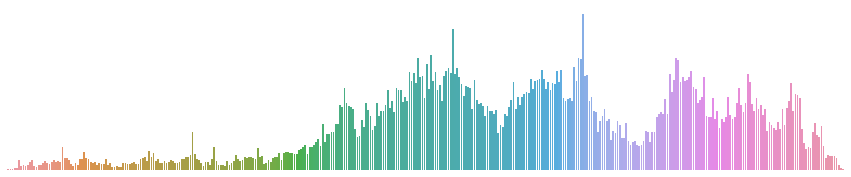

In [19]:
fig = plt.figure(figsize=(15,3))
sns.countplot(data=newDf,x='Valor')
plt.axis('off')

Observamos que os valores mais próximos da mínima foram pouco negociados. Isso ocorreu pois, neste dia, o dólar trabalhou próximo das máximas por quase o dia todo. Somente após uma notícia sobre o teto de gastos do governo, o dolár despencou e atingiu uma variação negativa. Neste caso removi os eixos somente para termos uma ideia visual das zonas de valor. Vamos agora, selecionar as 50 regiões com mais negócios no dia.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


5587.5 5780.0
302 607


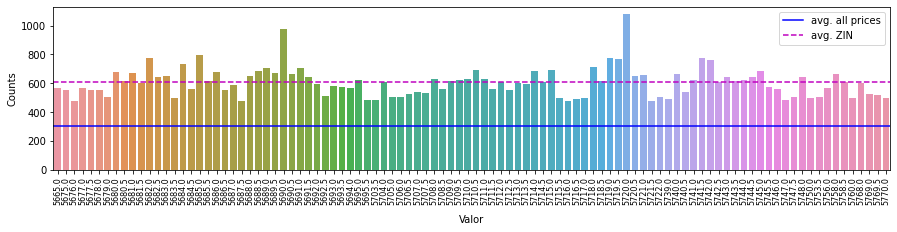

In [26]:
fig = plt.figure(figsize=(15,3))
dfRegValZon = pd.DataFrame(newDf['Valor'].value_counts())

prices = dfRegValZon['Valor'].index.tolist() 
counts = dfRegValZon['Valor'].tolist()
d = {'Valor': prices, 'Counts': counts}
ddf = pd.DataFrame(data=d)

interval = 100
sns.barplot(ddf['Valor'][:interval],ddf['Counts'][:interval],data=ddf)
plt.ylabel('Counts')
plt.xlabel('Valor',labelpad=10)
plt.xticks(rotation=90,fontsize=8)

print(ddf['Valor'].min(),ddf['Valor'].max())

avgAll = round(ddf['Counts'][:].mean())
plt.axhline(y=avgAll,color='b',label='avg. all prices')

avgZin = round(ddf['Counts'][:interval].mean())
plt.axhline(y=avgZin,color='m',linestyle='--',label='avg. ZIN')

print(avgAll,avgZin)

plt.legend()

Vemos que a média de negócios por nível de preço é de 302 ao passo que dentro da ZIN este número mais que dobra e 
atinge 607 negócios por nível de preço. Vamos agora determinar quem são os preços acima da média da ZIN. Serão os primeiros os N primeiros de ddf.

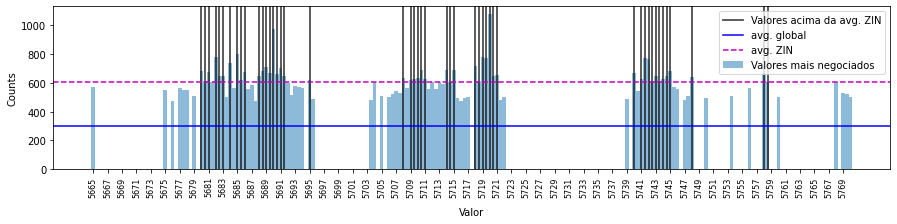

In [27]:
fig = plt.figure(figsize=(15,3))

plt.bar(ddf['Valor'][:interval],ddf['Counts'][:interval],0.5,
        data=ddf,alpha=.5,label='Valores mais negociados')
plt.ylabel('Counts')
plt.xlabel('Valor',labelpad=10)
plt.xticks(np.arange(ddf['Valor'][:interval].min(),ddf['Valor'][:interval].max(),2)
           ,rotation=90,fontsize=8)

for ival in range(interval) : 
    xx = ddf['Valor'].iloc[ival]
    yy = ddf['Counts'].iloc[ival]
    if (yy > avgZin) :
        if ival == 0 :
            plt.axvline(x=xx,color='k',lw=1.8,alpha=.7,
                        label='Valores acima da avg. ZIN')
        else :
            plt.axvline(x=xx,color='k',lw=1.8,alpha=.7)
            
avgAll = round(ddf['Counts'][:].mean())
plt.axhline(y=avgAll,color='b',label='avg. global')

avgZin = round(ddf['Counts'][:interval].mean())
plt.axhline(y=avgZin,color='m',linestyle='--',label='avg. ZIN')

plt.legend()

## Determinando a frequência de mercado e melhorando as regiões de valor.

## Determinando o perfil da região. (Comprador/Vendedor)

Nesta etapa queremos determinar de um dada região de preço tem um perfil mais comprador ou vendedor. 
Para isso vamos agrupar por niveis de preço e então dumificar a coluna agressor. Fazendo a soma de
Agressor x quantidade teremos o resultado. 

## Posicionamento das corretoras